In [2]:
#Air quality varies from 0 (bad quality) to 100 (top good quality)
#Water pollution varies from 0 (no pollution) to 100 (extreme pollution)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il file CSV
data = pd.read_csv("/home/mile/progetto VS/Dataset/confonto idrico e atmosferico/cities_air_quality_water_pollution.18-10-2021.csv", sep=',', quotechar='"')

# Rimuovi virgolette e spazi dai nomi delle colonne
data.columns = data.columns.str.replace('"', '').str.strip()

# Rimuovi le virgolette e spazi dai valori della colonna 'Country'
data['Country'] = data['Country'].str.replace('"', '').str.strip()

# Visualizza i nomi delle colonne per assicurarti che siano corretti
#print("Colonne dopo la pulizia:", data.columns)

# Verifica i valori unici della colonna 'Country' per accertarti che siano corretti
print("Valori unici della colonna 'Country':", data['Country'].unique())  # Verifica i valori nella colonna 'Country'

eu_paesi = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
    'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
    'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
    'Spain', 'Sweden'
]
data_filtered = data[data['Country'].isin(eu_paesi)]

# Salva i dati modificati in un nuovo file CSV
data_filtered.to_csv('/home/mile/progetto VS/Dataset/confonto idrico e atmosferico/cities_ue_air_water_pollution.2021.csv', index=False)
print("Dati filtrati salvati in 'cities_ue_air_water_pollution.2021.csv'")


Valori unici della colonna 'Country': ['United States of America' 'Germany' 'Switzerland' 'United Kingdom'
 'Egypt' 'France' 'Canada' 'Brazil' 'Lithuania' 'Monaco' 'Belgium'
 'Poland' 'Uzbekistan' 'Italy' 'Singapore' 'North Macedonia' 'Slovenia'
 'Bulgaria' 'Norway' 'Portugal' 'United Arab Emirates' 'Russia'
 "People's Republic of China" 'Georgia' 'India' 'Czech Republic' 'Israel'
 'Uruguay' 'Bangladesh' 'Pakistan' 'Croatia' 'Philippines' 'Argentina'
 'Mexico' 'Japan' 'Bolivia' 'Spain' "Cote d'Ivoire" 'Greece' 'Venezuela'
 'Guatemala' 'Cuba' 'Austria' 'Sweden' 'Finland' 'Ireland' 'Iceland'
 'Estonia' 'Latvia' 'Slovakia' 'Hungary' 'Luxembourg' 'Liechtenstein'
 'San Marino' 'Cambodia' 'Vietnam' 'Thailand' 'Andorra' 'Malaysia'
 'Taiwan' 'Ukraine' 'Chile' 'South Sudan' 'Armenia' 'Tanzania' 'Sudan'
 'Belarus' 'Somalia' 'The Bahamas' 'Yemen' 'Colombia' 'Peru' 'Ecuador'
 'Paraguay' 'Suriname' 'Nepal' 'Belize' 'Costa Rica' 'El Salvador'
 'Australia' 'Honduras' 'Nicaragua' 'Panama' 'Morocco' 'A

In [3]:
data = pd.read_csv("/home/mile/progetto VS/Dataset/confonto idrico e atmosferico/cities_ue_air_water_pollution.2021.csv", sep=',', quotechar='"')

# Creating AirPollution column
def subtraction_100(x):
    return 100 - x

data["AirPollution"] = data['AirQuality'].apply(subtraction_100)

# Creating WaterQuality column
data["WaterQuality"] = data['WaterPollution'].apply(subtraction_100)

data.head()

,City,Region,Country,AirQuality,WaterPollution,AirPollution,WaterQuality
0,Berlin,"""""",Germany,62.364130,28.612717,37.635870,71.387283
1,Paris,"""Ile-de-France""",France,34.024390,43.121693,65.975610,56.878307
2,Vilnius,"""""",Lithuania,77.247191,20.588235,22.752809,79.411765
3,Brussels,"""""",Belgium,35.810811,44.761905,64.189189,55.238095
4,Poznan,"""Greater Poland Voivodeship""",Poland,33.076923,50.423729,66.923077,49.576271


Text(48, 1.5, 'Media Complessiva:\n63.65')

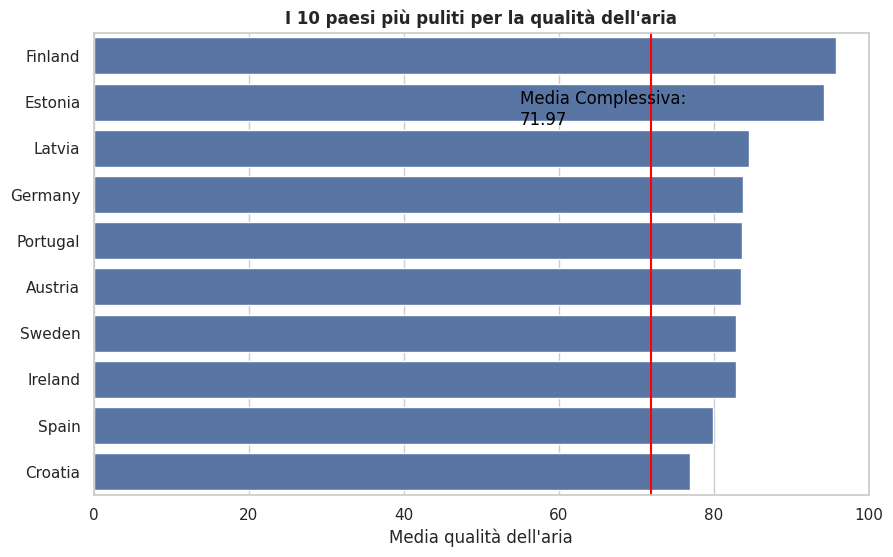

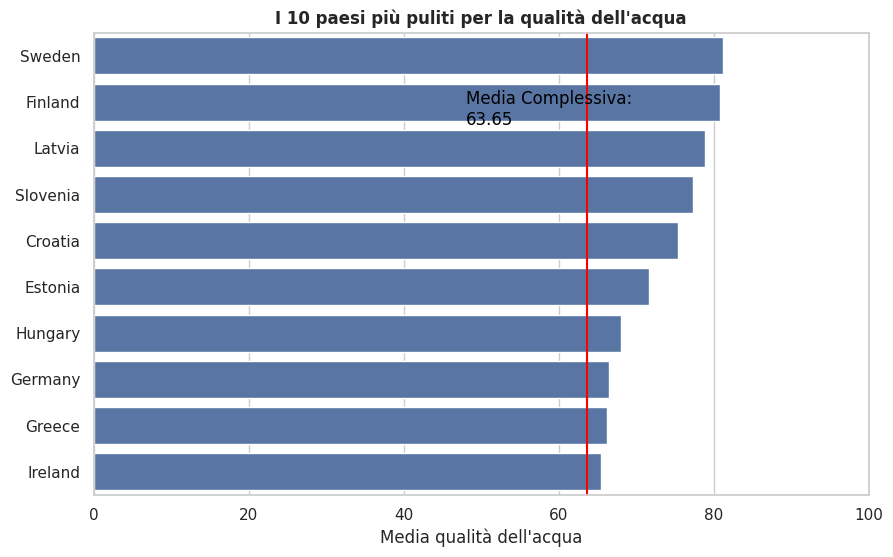

In [4]:
# Quale paese è in media il più pulito in termini di qualità dell'aria e dell'acqua?

# Qualità dell'aria

average_air_quality = data.groupby("Country", as_index=False).agg({"AirQuality":"mean"})

top_10_air_quality = average_air_quality.sort_values("AirQuality", ascending = False).head(10)

# Media complessiva Punteggio della qualità dell'aria
overall_avg_air_qual = average_air_quality["AirQuality"].mean()

plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
y = top_10_air_quality["Country"]
ax1 = sns.barplot(x = "AirQuality", y= y, data=top_10_air_quality)
ax1.set_title("I 10 paesi più puliti per la qualità dell'aria", fontweight="bold")
ax1.axvline(x = overall_avg_air_qual, ymin = 0, ymax = 100, color = "red")
ax1.set_xlabel("Media qualità dell'aria")
ax1.set_ylabel("")
ax1.set_xlim(0,100)
ax1.text(x = 55, y = 1.5, s = "Media Complessiva:\n{}".format(round(overall_avg_air_qual, 2)), color = "black")

# Qualità dell'acqua

average_water_quality = data.groupby("Country", as_index=False).agg({"WaterQuality":"mean"})

top_10_water_quality = average_water_quality.sort_values("WaterQuality", ascending = False).head(10)

# Media complessiva Punteggio della qualità dell'acqua
overall_avg_water_qual = average_water_quality["WaterQuality"].mean()

plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
y = top_10_water_quality["Country"]
ax2 = sns.barplot(x = "WaterQuality", y= y, data=top_10_water_quality)
ax2.set_title("I 10 paesi più puliti per la qualità dell'acqua", fontweight="bold")
ax2.axvline(x = overall_avg_water_qual, ymin = 0, ymax = 100, color = "red")
ax2.set_xlabel("Media qualità dell'acqua")
ax2.set_ylabel("")
ax2.set_xlim(0,100)
ax2.text(x = 48, y = 1.5, s = "Media Complessiva:\n{}".format(round(overall_avg_water_qual, 2)), color = "black")

Text(48.575, 1.5, 'Media Complessiva:\n36.35')

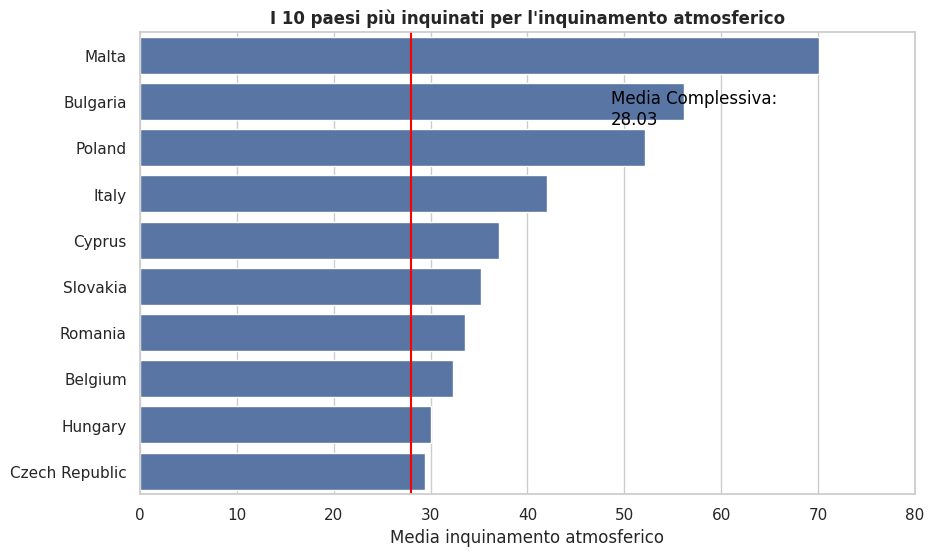

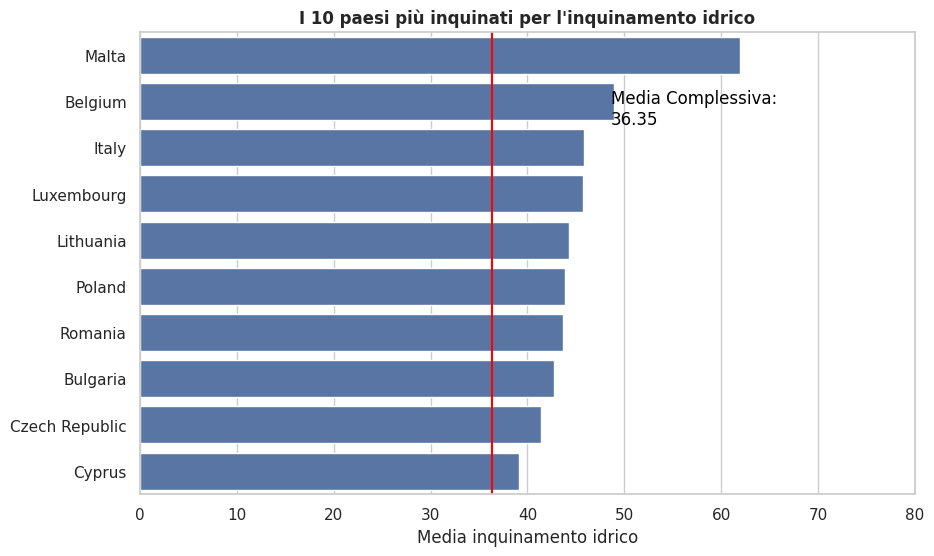

In [5]:
# Quale paese è in media il più inquinato in termini di inquinamento dell'aria e dell'acqua?
# Inquinamento atmosferico

average_air_pollution = data.groupby("Country", as_index=False).agg({"AirPollution":"mean"})

top_10_air_pollution = average_air_pollution.sort_values("AirPollution", ascending = False).head(10)

# Media complessiva Inquinamento atmosferico
overall_avg_air_pol = average_air_pollution["AirPollution"].mean()

plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
y = top_10_air_pollution["Country"]
ax3 = sns.barplot(x = "AirPollution", y= y, data=top_10_air_pollution)
ax3.set_title("I 10 paesi più inquinati per l'inquinamento atmosferico", fontweight="bold")

# Aggiungi la linea verticale per la media
ax3.axvline(x = overall_avg_air_pol, ymin = 0, ymax = 100, color = "red")

ax3.set_xlabel("Media inquinamento atmosferico")
ax3.set_ylabel("")
ax3.set_xlim(0,80)
ax3.text(x = 48.575, y = 1.5, s = "Media Complessiva:\n{}".format(round(overall_avg_air_pol, 2)), color = "black")

# Inquinamento idrico

average_water_pollution = data.groupby("Country", as_index=False).agg({"WaterPollution":"mean"})

top_10_water_pollution = average_water_pollution.sort_values("WaterPollution", ascending = False).head(10)

# Media complessiva Inquinamento idrico
overall_avg_water_pol = average_water_pollution["WaterPollution"].mean()

plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
y = top_10_water_pollution["Country"]
ax4 = sns.barplot(x = "WaterPollution", y= y, data=top_10_water_pollution)
ax4.set_title("I 10 paesi più inquinati per l'inquinamento idrico", fontweight="bold")
ax4.axvline(x = overall_avg_water_pol, ymin = 0, ymax = 100, color = "red")
ax4.set_xlabel("Media inquinamento idrico")
ax4.set_ylabel("")
ax4.set_xlim(0,80)
ax4.text(x = 48.575, y = 1.5, s = "Media Complessiva:\n{}".format(round(overall_avg_water_pol, 2)), color = "black")


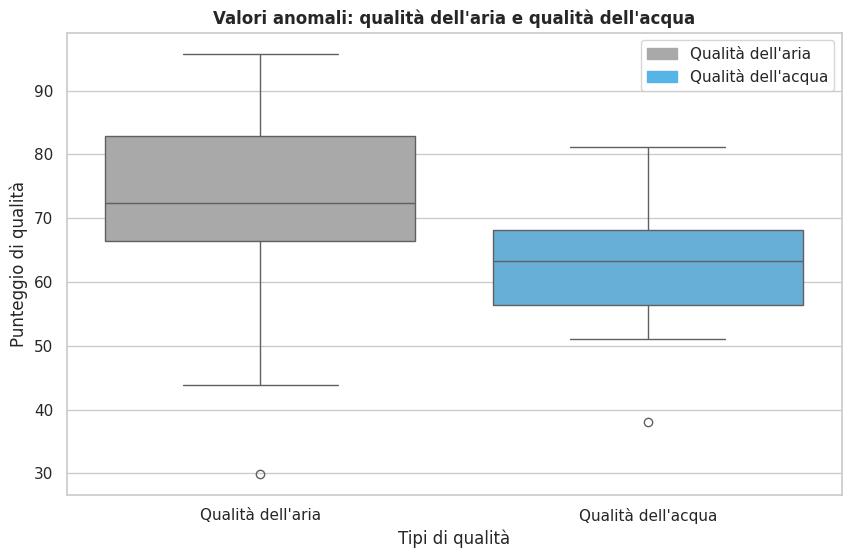

In [6]:
# Creazione di boxplot per trovare valori anomali
average_quality_scores = data.groupby("Country", as_index=False).agg({"AirQuality":"mean", "WaterQuality":"mean"})
average_quality_scores_pivot = pd.melt(average_quality_scores, id_vars=['Country'], value_vars=['AirQuality', 'WaterQuality'], var_name='Quality_Types', value_name='Avg_Scores')

# Sostituisci le etichette in inglese con quelle in italiano
average_quality_scores_pivot['Quality_Types'] = average_quality_scores_pivot['Quality_Types'].replace({
    'AirQuality': 'Qualità dell\'aria', 
    'WaterQuality': 'Qualità dell\'acqua'
})

plt.figure(figsize = (10,6))
palette = ["#A9A9A9", "#56B4E9"]
ax5 = sns.boxplot(x = "Quality_Types", y = "Avg_Scores", data = average_quality_scores_pivot, hue = "Quality_Types", palette=palette)
ax5.set_title("Valori anomali: qualità dell'aria e qualità dell'acqua", fontweight="bold")
ax5.set_xlabel("Tipi di qualità")
ax5.set_ylabel("Punteggio di qualità")

# Aggiungo manualmente la legenda
import matplotlib.patches as mpatches
# Aggiungo la legenda
legend_handles = [
    mpatches.Patch(color=palette[0], label="Qualità dell'aria"),  # Grigio
    mpatches.Patch(color=palette[1], label="Qualità dell'acqua")  # Blu
]
ax5.legend(handles=legend_handles, loc="best")

# Mostra il grafico
plt.show()

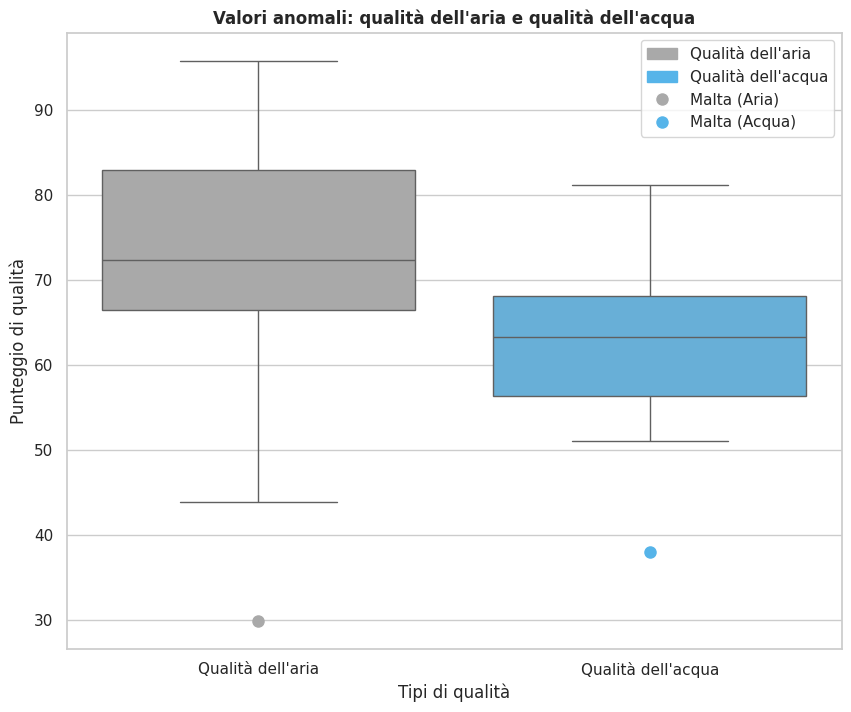

In [7]:
import matplotlib.patches as mpatches

# Creazione di boxplot per trovare valori anomali
average_quality_scores = data.groupby("Country", as_index=False).agg({"AirQuality": "mean", "WaterQuality": "mean"})
average_quality_scores_pivot = pd.melt(average_quality_scores, id_vars=['Country'], value_vars=['AirQuality', 'WaterQuality'], var_name='Quality_Types', value_name='Avg_Scores')

# Sostituisci le etichette in inglese con quelle in italiano
average_quality_scores_pivot['Quality_Types'] = average_quality_scores_pivot['Quality_Types'].replace({
    'AirQuality': 'Qualità dell\'aria', 
    'WaterQuality': 'Qualità dell\'acqua'
})

# Funzione per identificare i valori anomali
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primo quartile
    Q3 = df[column].quantile(0.75)  # Terzo quartile
    IQR = Q3 - Q1                  # Intervallo interquartile
    
    # Calcolo dei limiti per i valori anomali
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtriamo i valori anomali
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Troviamo i valori anomali per qualità dell'aria e qualità dell'acqua
air_quality_outliers = find_outliers(average_quality_scores, "AirQuality")
water_quality_outliers = find_outliers(average_quality_scores, "WaterQuality")

# Crea il boxplot
plt.figure(figsize=(10, 8))
palette = ["#A9A9A9", "#56B4E9"]  # Grigio per l'aria e blu per l'acqua
ax5a = sns.boxplot(
    x="Quality_Types", 
    y="Avg_Scores", 
    data=average_quality_scores_pivot, 
    hue="Quality_Types", 
    palette=palette
)

# Titolo e etichette
ax5a.set_title("Valori anomali: qualità dell'aria e qualità dell'acqua", fontweight="bold")
ax5a.set_xlabel("Tipi di qualità")
ax5a.set_ylabel("Punteggio di qualità")

# Aggiungi la legenda personalizzata per i boxplot
legend_handles = [
    mpatches.Patch(color=palette[0], label="Qualità dell'aria"),  # Grigio
    mpatches.Patch(color=palette[1], label="Qualità dell'acqua")  # Blu
]

# Lista per tenere traccia dei paesi con valori anomali
outlier_countries = []

# Evidenzia i valori anomali con dei marker
# Per la qualità dell'aria
for _, row in air_quality_outliers.iterrows():
    ax5a.plot("Qualità dell'aria", row["AirQuality"], marker='o', color=palette[0], markersize=8)
    outlier_countries.append(f"{row['Country']} (Aria)")  # Aggiungi paese alla lista

# Per la qualità dell'acqua
for _, row in water_quality_outliers.iterrows():
    ax5a.plot("Qualità dell'acqua", row["WaterQuality"], marker='o', color=palette[1], markersize=8)
    outlier_countries.append(f"{row['Country']} (Acqua)")  # Aggiungi paese alla lista

#print(outlier_countries)

from matplotlib.lines import Line2D

# Aggiungi la legenda per i valori anomali
outlier_legend_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[0], markersize=10, label=outlier_countries[0]),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[1], markersize=10, label=outlier_countries[1]),
]

# Mostra la legenda finale
ax5a.legend(handles=(legend_handles+outlier_legend_handles), loc="best")

# Mostra il grafico
plt.show()


Intercetta: 26.9341
Coefficiente: [0.51020181]


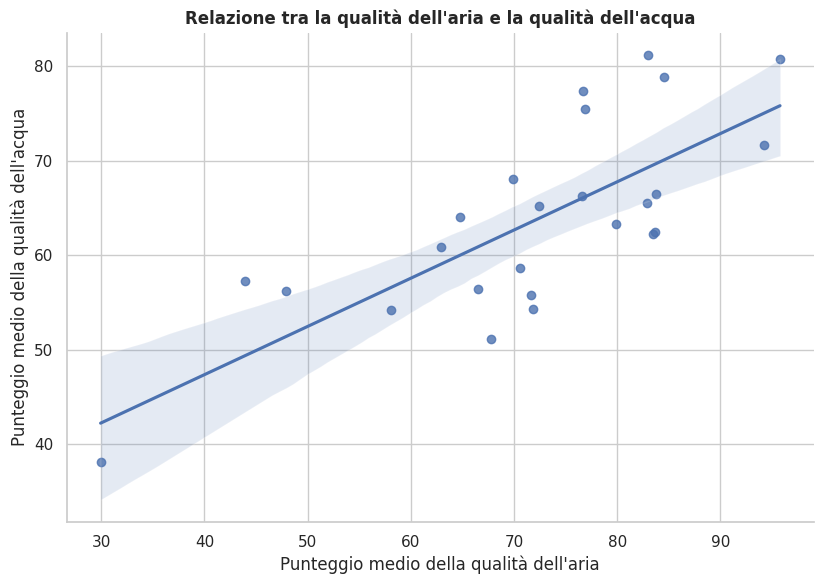

In [8]:
# Trovare una relazione lineare
# Importare librerie che ci servono
import numpy as np
from sklearn.linear_model import LinearRegression

# Creazione dell'array per la qualità dell'aria e dell'acqua
air_quality = np.array(average_quality_scores["AirQuality"]).reshape(-1, 1)
water_quality = np.array(average_quality_scores["WaterQuality"])

# Creazione del modello di regressione lineare
lm = LinearRegression()
lm.fit(air_quality, water_quality)

print("Intercetta: {}".format(round(lm.intercept_, 4)))
print("Coefficiente: {}".format(lm.coef_))


# Creating LM plot with Seaborn
relazione_qualità = sns.lmplot(x="AirQuality", y="WaterQuality", data = average_quality_scores, height=6, aspect=1.4)
ax6 = plt.gca()
ax6.set_title("Relazione tra la qualità dell'aria e la qualità dell'acqua", fontweight="bold")
ax6.set_xlabel("Punteggio medio della qualità dell'aria")
ax6.set_ylabel("Punteggio medio della qualità dell'acqua")
plt.tight_layout()
